In [17]:
#Here we import necessary libraries for the assigment
import pandas as pd
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
#Read the data
df = pd.read_csv('drone_delivery_v1.csv', sep=';')
df = df.drop('clientid', axis = 1)

#Set the number of clusters to 3
num_clusters3 = 3

#Get the column names before it's too late
colnames = list(df.columns.values.tolist())


<AxesSubplot:xlabel='x', ylabel='y'>

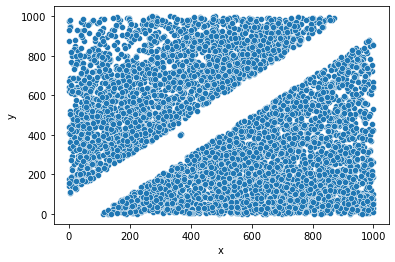

In [61]:
#Visualize the client locations with a two-dimensional scatter plot
sns.scatterplot(x='x', y='y', data=df)

In [62]:
#Let K-means work it's magic and find locations for the depot centers
kmeans = cluster.KMeans(n_clusters=num_clusters3)
kmeans.fit_predict(df)
depot_centers = kmeans.cluster_centers_
print(depot_centers)

[[698.85163315 208.17933603]
 [196.28590488 391.99062506]
 [556.04533363 785.49576168]]


In [63]:
#Depot center dataframe from the colum names and the depot center locations calculated above
depot_centers_df = pd.DataFrame(depot_centers, columns=colnames)
print(depot_centers_df)

            x           y
0  698.851633  208.179336
1  196.285905  391.990625
2  556.045334  785.495762


               x           y  Cluster
0     622.771572  164.857623        0
1     416.357298  630.193634        2
2     292.735020  567.333231        1
3     737.211288  166.225676        0
4     540.475375  682.912298        2
...          ...         ...      ...
5951  832.857394  616.861410        2
5952  242.734500  490.325092        1
5953  108.690847  758.833921        1
5954  803.251074  430.740623        0
5955  481.343899  285.910055        0

[5956 rows x 3 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

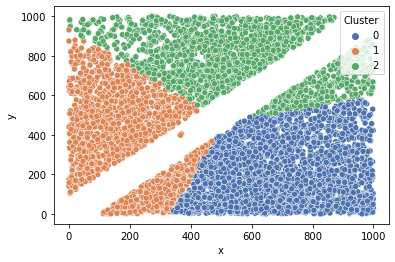

In [64]:
#Add the cluster column
df['Cluster'] = kmeans.labels_
print(df)

#Visualize the clients in 3 coloroured clusters to visualize each drones area of operation
sns.scatterplot(data=df, x='x', y='y',  hue='Cluster', palette = 'deep')

In [65]:
#Setting the number of clusters to 10 instead
num_clusters10 = 10

In [66]:
#Let K-means again work it's magic to find locations for the depot centers
#value is stored with a new name just in case
kmeans2 = cluster.KMeans(n_clusters=num_clusters10)
kmeans2.fit_predict(df)
depot_centers2 = kmeans.cluster_centers_
print(depot_centers2)

[[698.85163315 208.17933603]
 [196.28590488 391.99062506]
 [556.04533363 785.49576168]]


               x           y  Cluster
0     622.771572  164.857623        0
1     416.357298  630.193634        2
2     292.735020  567.333231        1
3     737.211288  166.225676        0
4     540.475375  682.912298        2
...          ...         ...      ...
5951  832.857394  616.861410        2
5952  242.734500  490.325092        1
5953  108.690847  758.833921        1
5954  803.251074  430.740623        0
5955  481.343899  285.910055        0

[5956 rows x 3 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

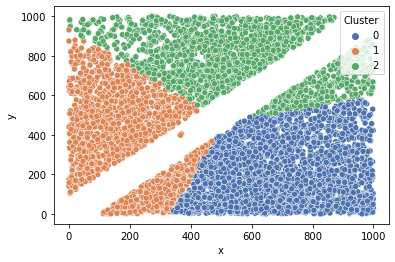

In [67]:
#Add the cluster column
df['Cluster'] = kmeans.labels_
print(df)

#Visualize the clients in 10 coloroured clusters to visualize each drones area of operation
sns.scatterplot(data=df, x='x', y='y',  hue='Cluster', palette = 'deep')

No difference in computational time was noticed, if there is one its really really small

In [69]:
#Lets try with agglomerative hierarchical clustering and see what happens
#first create another number of clusters that is equal to 5
num_clusters5 = 5
Agglo1 = cluster.AgglomerativeClustering(n_clusters=num_clusters3).fit(df)
Agglo2 = cluster.AgglomerativeClustering(n_clusters=num_clusters5).fit(df)
Agglo3 = cluster.AgglomerativeClustering(n_clusters=num_clusters10).fit(df)
Agglo1.fit_predict(df)
Agglo2.fit_predict(df)
Agglo3.fit_predict(df)



array([3, 0, 0, ..., 2, 7, 6], dtype=int64)